In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import kernel_ridge
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error
import sys
import time
from scipy.special import expit

In [178]:
data_df = pd.read_csv('Data/weather.csv', index_col=0)
data_df.columns

Index(['temperature', 'apparentTemperature', 'dewPoint', 'humidity',
       'pressure', 'windSpeed', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility'],
      dtype='object')

In [179]:
data_df.head()

,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,visibility
time,,,,,,,,,,
1262304000,73.45,75.07,72.69,0.97,1010.3,6.72,71.0,0.50,0.0,NaN
1262390400,71.67,72.95,69.81,0.94,1011.0,2.29,41.0,0.44,0.0,4.974
1262476800,75.25,76.89,73.39,0.94,1011.6,1.16,30.0,0.75,0.0,4.346
1262563200,75.25,76.64,71.61,0.88,1010.9,3.46,71.0,0.75,0.0,6.216
1262649600,75.25,76.89,73.39,0.94,1010.1,6.91,120.0,0.44,0.0,6.216


In [180]:
data_df.describe()

,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,visibility
count,730.000000,730.000000,730.000000,730.000000,723.000000,730.000000,662.000000,726.000000,726.000000,715.000000
mean,77.140397,80.739726,74.183274,0.911233,1009.774412,4.726534,143.509063,0.491928,0.643251,5.069698
std,3.639286,6.316240,3.891820,0.083330,1.970895,2.851606,109.787909,0.201766,0.479370,1.631170
min,66.270000,66.480000,60.800000,0.610000,1003.700000,0.000000,0.000000,0.190000,0.000000,0.434000
25%,75.250000,76.640000,72.865000,0.840000,1008.500000,2.290000,50.000000,0.440000,0.000000,3.730000
50%,77.060000,79.150000,75.190000,0.940000,1009.600000,4.610000,110.000000,0.440000,1.000000,6.216000
75%,78.880000,83.380000,76.990000,1.000000,1010.800000,6.720000,230.000000,0.750000,1.000000,6.216000
max,86.060000,99.510000,80.580000,1.000000,1016.800000,22.380000,350.000000,1.000000,1.000000,10.000000


In [181]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1262304000 to 1325289600
Data columns (total 10 columns):
temperature            730 non-null float64
apparentTemperature    730 non-null float64
dewPoint               730 non-null float64
humidity               730 non-null float64
pressure               723 non-null float64
windSpeed              730 non-null float64
windBearing            662 non-null float64
cloudCover             726 non-null float64
uvIndex                726 non-null float64
visibility             715 non-null float64
dtypes: float64(10)
memory usage: 62.7 KB


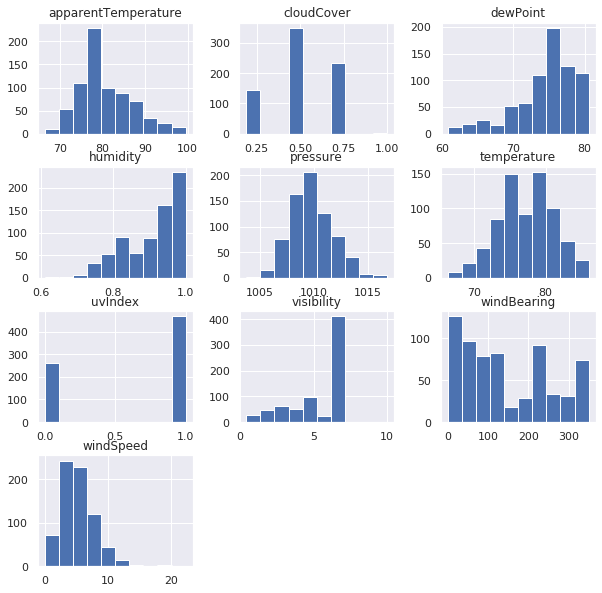

In [182]:
sns.set()
data_df.hist(figsize=(10,10))
plt.show()

In [189]:
# split the input and label
X_data = data_df.loc[:, data_df.columns != "humidity"]
y_data = data_df["humidity"]

In [216]:
X_data_train, X_data_val, y_data_train, y_data_val = train_test_split(X_data, y_data, test_size=0.2)

In [217]:
nume_cols = X_data_train.columns
imputer_nume = SimpleImputer(missing_values=np.nan, strategy='mean')
nume_cate = ColumnTransformer([('nume_cols', imputer_nume, nume_cols)])
scaler_model = StandardScaler()
linearRegression = linear_model.LinearRegression()
full_pipeline = make_pipeline(nume_cate, scaler_model, linearRegression)

In [231]:
full_pipeline.fit(X_data_train, y_data_train)
score_train = full_pipeline.score(X_data_train, y_data_train, sample_weight=None)
score_val = full_pipeline.score(X_data_val, y_data_val, sample_weight=None)
full_pipeline.fit(X_data, y_data)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('nume_cols',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0),
                                                  Index(['temperature', 'apparentTemperature', 'dewPoint', 'pressure',
       'windSpeed', 'windBearing', 'cloudCover', 'uvIndex', 'visibility'],
      dtype='obje

In [232]:
preprocessed_predict = full_pipeline.predict(X_data)
preprocessed_predict

array([0.97253032, 0.93940582, 0.94211946, 0.88866531, 0.94025814,
       0.88765762, 0.93834483, 0.99064768, 0.99210521, 0.88837461,
       0.93964058, 0.9918026 , 0.99009015, 0.93580311, 0.99021296,
       0.7807634 , 0.83296336, 0.88513137, 0.88749544, 0.99389385,
       0.99357452, 0.99255877, 0.94020076, 0.99232301, 0.99472238,
       0.99222401, 0.99280728, 0.94020752, 0.9383827 , 0.88751456,
       0.93984762, 0.99060855, 0.94008121, 0.94001977, 0.89778713,
       0.93983195, 0.94038608, 0.99168977, 0.88843599, 0.78336382,
       0.88855034, 0.99312737, 0.95853147, 0.94040337, 0.67993665,
       0.88881353, 0.83603137, 0.83612799, 0.9921339 , 0.99172227,
       0.88880499, 0.83708717, 0.83608349, 0.83639677, 0.99143414,
       0.99608523, 0.93999973, 0.94043866, 0.88786674, 0.83602672,
       0.94067956, 0.83678089, 0.94196158, 0.8361173 , 0.89057004,
       0.88782153, 0.83560385, 0.7847337 , 0.94038899, 0.73121748,
       0.83729359, 0.78416222, 0.83600438, 0.76875498, 0.73300

In [233]:
mean_absolute_error(y_data, preprocessed_predict)

0.003763248015090702